# KMeans Clustering Lab - CS 4372

In this lab, we will apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

You will need to complete the steps mentioned below and turn in the completed notebook. You can share the link of the finished notebook.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

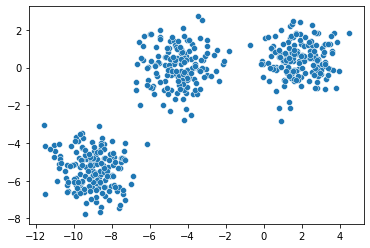

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1])

Now, it's your turn to create a synthetic dataset of 3 dimensions consisting of three clusters. You will also need to visualize this data using a 3-D plot. You can use any suitable library.

In [ ]:
# TODO: Create a 3 feature dataset generated using 3 clusters and plot it.

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [ ]:
predicted_clusters = 2 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [ ]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
y_pred = km.fit_predict(X)

## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

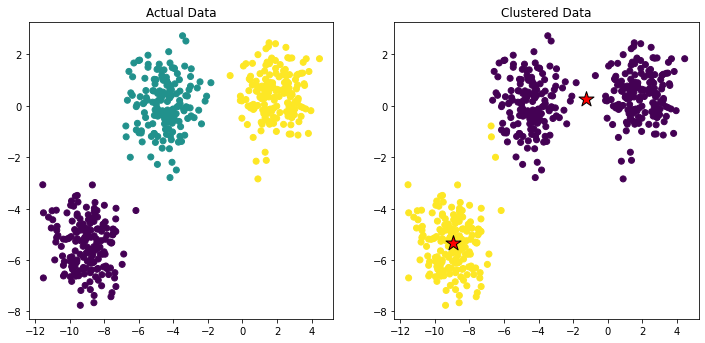

In [ ]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [ ]:
km.inertia_

4374.467932897689

In [ ]:
silhouette_score(X, y_pred)

0.6274472426807147

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

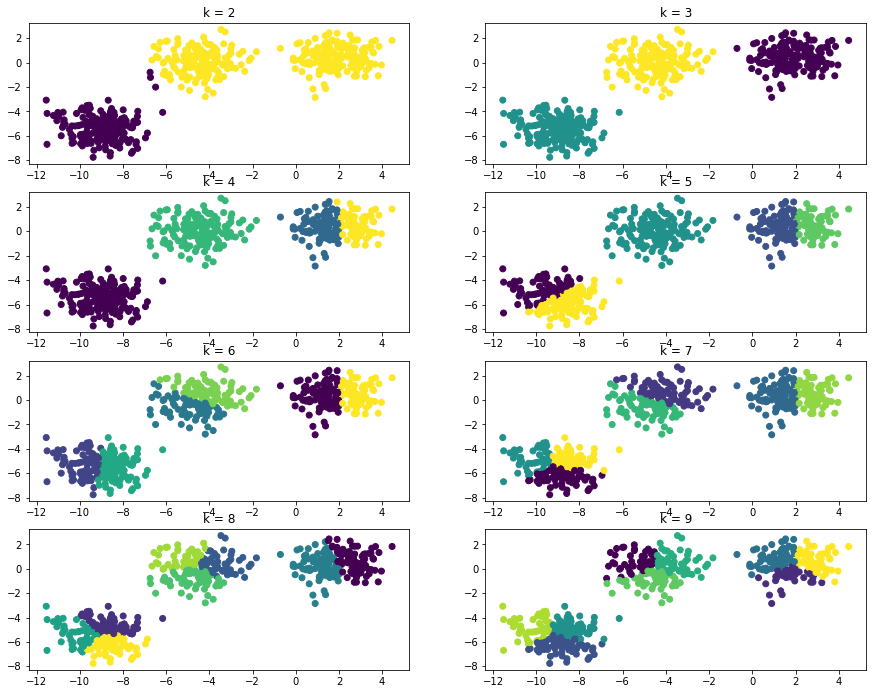

In [ ]:
plt.figure(figsize=(10, 10))

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  plt.subplot(5, 2, i)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("k = " + str(k))
  i = i + 1

plt.show()

Now, try to find the WCSS and Silhouette width for each value of k and plot them. Which seems to be the best value for k?

In [ ]:
# TODO: Code what is stated above.

# Working with the California Housing Dataset

Download the California housing dataset

In [1]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/housing_clustering.csv")

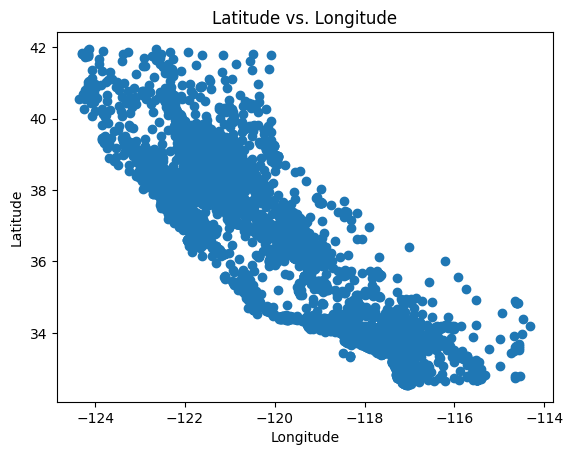

In [2]:
#TODO: Make a scatter plot of latitude and longitude
import matplotlib.pyplot as plt
plt.scatter(housing["longitude"], housing["latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Latitude vs. Longitude")
plt.show()

In [3]:
#TODO: Perform K-Means clustering and check if the centers resemble the location of major cities/areas in California
from sklearn.cluster import KMeans
X = housing[["latitude", "longitude"]]
K = 5
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} Center: Latitude={center[0]}, Longitude={center[1]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center: Latitude=33.05150627615063, Longitude=-116.93539284053928
Cluster 2 Center: Latitude=37.838542248346805, Longitude=-121.86717119764879
Cluster 3 Center: Latitude=35.98288145207034, Longitude=-119.68969370391379
Cluster 4 Center: Latitude=39.9146442687747, Longitude=-122.28553359683795
Cluster 5 Center: Latitude=34.01336962622068, Longitude=-118.11860814906275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

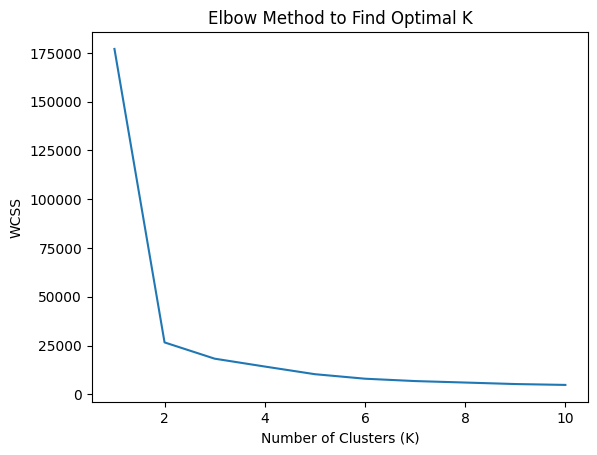

In [4]:
#TODO: Using WCSS or Silhouette Width, find best value of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Find Optimal K")
plt.show()


## Working with US Arrests Data and Pipelines

Let's read the USArrests data that can be downloaded from:

https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv


In [12]:
# TODO: Read in the file to a dataframe and ensure everything is loaded properly
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)
print(arrests.head())

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


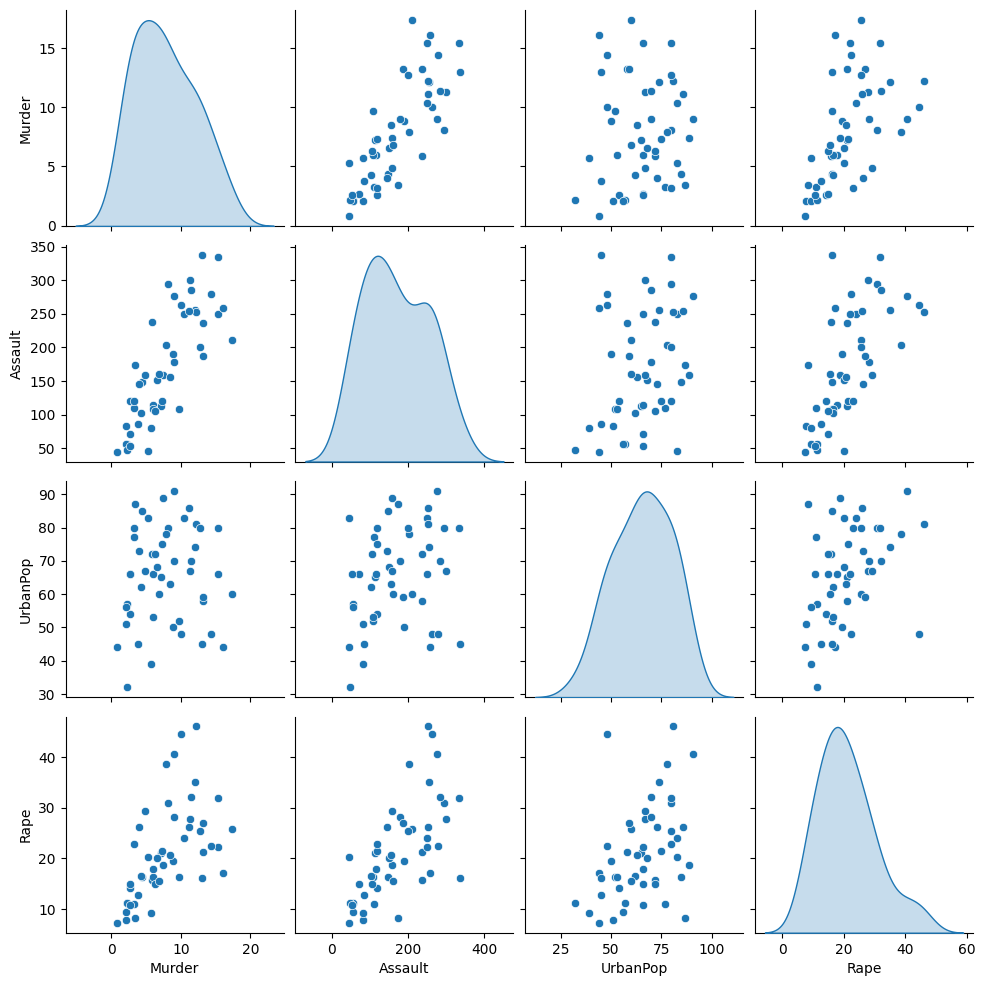

In [17]:
# TODO: Create a pairwise scatter plot and visualize relationships between variables
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)
states = arrests.index
sns.pairplot(arrests, diag_kind="kde")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

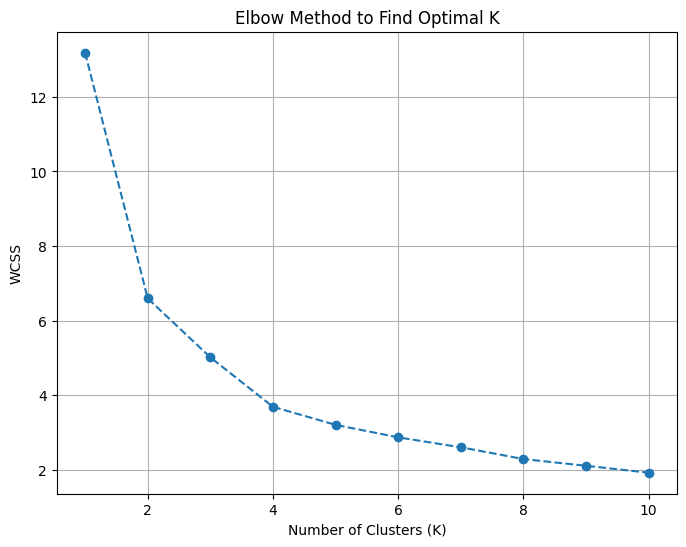

In [18]:
# TODO: Let's create a pipeline of scaler and then k-means and use it on the dataset
kmeansPipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("kmeans", KMeans(n_clusters=4, max_iter=500)),
    ]
)
wcss = []

for k in range(1, 11):
    kmeansPipeline.set_params(kmeans__n_clusters=k)
    kmeansPipeline.fit(arrests)
    wcss.append(kmeansPipeline.named_steps['kmeans'].inertia_)

# Plot the WCSS values to determine the best value of K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.grid()
plt.show()

In [19]:
# TODO: apply the pipeline on the data
kmeansPipeline.set_params(kmeans__n_clusters=4)
kmeansPipeline.fit(arrests)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans', KMeans(max_iter=500, n_clusters=4))])

In [21]:
# TODO: try various values of k and check which value of k may be the best
arrests['Cluster'] = kmeansPipeline.named_steps['kmeans'].labels_
clustered_states = arrests.groupby('Cluster')

In [23]:
#TODO: I would like to live in a state that is different in crime from TX. What choices do I have? Which states have lowest crime profiles?
low_crime_states = arrests[arrests['Cluster'] == arrests['Cluster'].min()].index
print(f'States with the lowest crime profile: {", ".join(low_crime_states)}')

States with the lowest crime profile: Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, Missouri, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming
